In [1]:
# STEP 1.1

!git clone https://github.com/sorki/python-mnist
!./python-mnist/bin/mnist_get_data.sh
!pip3 install emnist
from emnist import extract_training_samples

print("Imported the EMNIST libraries we need!")

Cloning into 'python-mnist'...
remote: Enumerating objects: 246, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 246 (delta 1), reused 2 (delta 0), pack-reused 240 (from 1)
Receiving objects: 100% (246/246), 47.14 KiB | 3.93 MiB/s, done.
Resolving deltas: 100% (119/119), done.
--2025-03-20 14:13:50--  http://yann.lecun.com/exdb/mnist/
Resolving yann.lecun.com (yann.lecun.com)... 15.204.224.156
Connecting to yann.lecun.com (yann.lecun.com)|15.204.224.156|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 756 [text/html]
Saving to: ‘data/index.html.tmp’

index.html.tmp      100%[===================>]     756  --.-KB/s    in 0s      

2025-03-20 14:13:50 (85.2 MB/s) - ‘data/index.html.tmp’ saved [756/756]

Loading robots.txt; please ignore errors.
--2025-03-20 14:13:50--  http://yann.lecun.com/robots.txt
Reusing existing connection to yann.lecun.com:80.
HTTP request sent, awaiting response... 404 Not Foun

In [7]:
import torch
from torchvision import datasets, transforms

# Define transformation to convert images to tensors and normalize pixel values
transform = transforms.Compose([transforms.ToTensor()])

# Download and load the full EMNIST 'letters' dataset
train_dataset = datasets.EMNIST(root='./data', split='letters', train=True, transform=transform, download=True)
test_dataset = datasets.EMNIST(root='./data', split='letters', train=False, transform=transform, download=True)

# Extract image data and labels
X = torch.cat((train_dataset.data, test_dataset.data), dim=0).numpy()  # Combine train and test sets
y = torch.cat((train_dataset.targets, test_dataset.targets), dim=0).numpy()

# Normalize pixel values to be between 0 and 1
X = X / 255.0

# Use the first 60,000 instances as training and the next 10,000 as testing
X_train, X_test = X[:60000], X[60000:70000]
y_train, y_test = y[:60000], y[60000:70000]

# Reshape images to be 1D vectors (28x28 → 784)
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

print("Extracted our samples and divided our training and testing datasets successfully!")


Extracted our samples and divided our training and testing datasets successfully!


Image Label: r


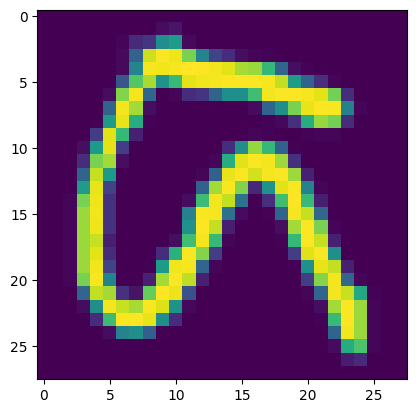

In [11]:
# STEP 1.3

import matplotlib.pyplot as plt

img_index = 12000 # <<<<<  You can update this value to look at other images
img = X_train[img_index]
print("Image Label: " + str(chr(y_train[img_index]+96)))
plt.imshow(img.reshape((28,28)))

In [12]:
# STEP 2.1

# These two lines import the ML libraries we need
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier

# This creates our first MLP with 1 hidden layer with 50 neurons and sets it to run through the data 20 times
mlp1 = MLPClassifier(hidden_layer_sizes=(50,), max_iter=20, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)

print("Created our first MLP network")

Created our first MLP network


In [13]:
# STEP 3.1

mlp1.fit(X_train, y_train)
print("Training set score: %f" % mlp1.score(X_train, y_train))
print("Test set score: %f" % mlp1.score(X_test, y_test))

Iteration 1, loss = 1.05878600
Iteration 2, loss = 0.64927627
Iteration 3, loss = 0.55637319
Iteration 4, loss = 0.51273212
Iteration 5, loss = 0.48404966
Iteration 6, loss = 0.46317090
Iteration 7, loss = 0.44595547
Iteration 8, loss = 0.43564624
Iteration 9, loss = 0.42494025
Iteration 10, loss = 0.41526839
Iteration 11, loss = 0.40854953
Iteration 12, loss = 0.39905919
Iteration 13, loss = 0.39325826
Iteration 14, loss = 0.38700867
Iteration 15, loss = 0.38029587
Iteration 16, loss = 0.37702644
Iteration 17, loss = 0.37286688
Iteration 18, loss = 0.36789455
Iteration 19, loss = 0.36424306
Iteration 20, loss = 0.35785232


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Training set score: 0.886650
Test set score: 0.841900


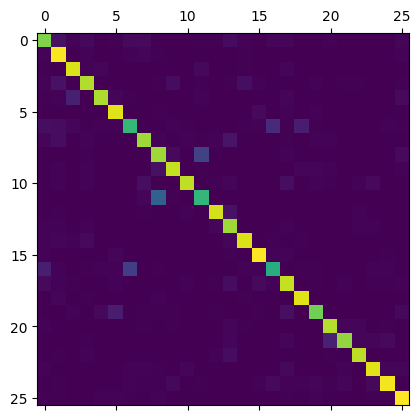

In [14]:
# STEP 3.2

# First let's initialize a list with all the predicted values from the training set
y_pred = mlp1.predict(X_test)

# Now let's visualize the errors between the predictions and the actual labels using a confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.matshow(cm)

There were 71 times that the letter i was predicted to be the letter l.


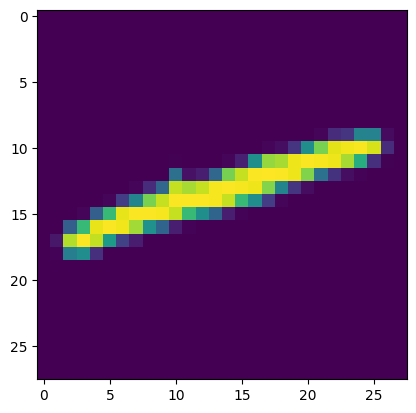

In [15]:
# STEP 3.3

# You can change this to any letters that you think the neural network may have confused...
predicted_letter = 'l'
actual_letter = 'i'


# This code counts all mistakes for the letters above
mistake_list = []
for i in range(len(y_test)):
  if (y_test[i] == (ord(actual_letter) - 96) and y_pred[i] == (ord(predicted_letter) - 96)):
    mistake_list.append(i)
print("There were " + str(len(mistake_list)) + " times that the letter " + actual_letter + " was predicted to be the letter " + predicted_letter + ".")

# Once we know how many mistakes were made, we can change this to see an image of a particular one
mistake_to_show = 4 # <<< e.g., change this to 3 if you want to see the 4th mistake

# This code checks that the number mistake you asked for can be shown and if so, displays an image of it
if (len(mistake_list)> mistake_to_show):
  img = X_test[mistake_list[mistake_to_show]]
  plt.imshow(img.reshape((28,28)))
else:
  print("Couldn't show mistake number " + str(mistake_to_show + 1) + " because there were only " + str(len(mistake_list)) + " mistakes to show!")

In [16]:
# STEP 3.4

# Change some of the values in the below statement and re-run to see how they
# affect performance!
mlp2 = MLPClassifier(hidden_layer_sizes=(100,100,100,100,100,), max_iter=50, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)
mlp2.fit(X_train, y_train)
print("Training set score: %f" % mlp2.score(X_train, y_train))
print("Test set score: %f" % mlp2.score(X_test, y_test))

Iteration 1, loss = 1.19213072
Iteration 2, loss = 0.55569686
Iteration 3, loss = 0.45240539
Iteration 4, loss = 0.40164871
Iteration 5, loss = 0.36415481
Iteration 6, loss = 0.33833428
Iteration 7, loss = 0.31944485
Iteration 8, loss = 0.29416651
Iteration 9, loss = 0.28231331
Iteration 10, loss = 0.27511733
Iteration 11, loss = 0.26498406
Iteration 12, loss = 0.25555369
Iteration 13, loss = 0.24877935
Iteration 14, loss = 0.24513431
Iteration 15, loss = 0.23716811
Iteration 16, loss = 0.22946943
Iteration 17, loss = 0.22761312
Iteration 18, loss = 0.21938314
Iteration 19, loss = 0.21413617
Iteration 20, loss = 0.21868199
Iteration 21, loss = 0.21129555
Iteration 22, loss = 0.21021434
Iteration 23, loss = 0.20279345
Iteration 24, loss = 0.19913563
Iteration 25, loss = 0.20344832
Iteration 26, loss = 0.20051670
Iteration 27, loss = 0.19459391
Iteration 28, loss = 0.19744981
Iteration 29, loss = 0.19993073
Iteration 30, loss = 0.19206002
Iteration 31, loss = 0.19120739
Iteration 32, los

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Training set score: 0.940817
Test set score: 0.882000


In [17]:
# STEP 4.1

# Pulls the scanned data set from GitHub
!git clone https://github.com/crash-course-ai/lab1-neural-networks.git
!git pull
!ls lab1-neural-networks/letters_mod
!cd /content/lab1-neural-networks/letters_mod
!pwd

# Puts all the data in the "files" variable
import os
path, dirs, files = next(os.walk("/content/lab1-neural-networks/letters_mod/"))
files.sort()

Cloning into 'lab1-neural-networks'...
remote: Enumerating objects: 152, done.
remote: Total 152 (delta 0), reused 0 (delta 0), pack-reused 152 (from 1)
Receiving objects: 100% (152/152), 4.60 MiB | 10.86 MiB/s, done.
Resolving deltas: 100% (59/59), done.
fatal: not a git repository (or any of the parent directories): .git
00.jpg	09.jpg	18.jpg	27.jpg	36.jpg	45.jpg	54.jpg	63.jpg	72.jpg	81.jpg	90.jpg	99.jpg
01.jpg	10.jpg	19.jpg	28.jpg	37.jpg	46.jpg	55.jpg	64.jpg	73.jpg	82.jpg	91.jpg
02.jpg	11.jpg	20.jpg	29.jpg	38.jpg	47.jpg	56.jpg	65.jpg	74.jpg	83.jpg	92.jpg
03.jpg	12.jpg	21.jpg	30.jpg	39.jpg	48.jpg	57.jpg	66.jpg	75.jpg	84.jpg	93.jpg
04.jpg	13.jpg	22.jpg	31.jpg	40.jpg	49.jpg	58.jpg	67.jpg	76.jpg	85.jpg	94.jpg
05.jpg	14.jpg	23.jpg	32.jpg	41.jpg	50.jpg	59.jpg	68.jpg	77.jpg	86.jpg	95.jpg
06.jpg	15.jpg	24.jpg	33.jpg	42.jpg	51.jpg	60.jpg	69.jpg	78.jpg	87.jpg	96.jpg
07.jpg	16.jpg	25.jpg	34.jpg	43.jpg	52.jpg	61.jpg	70.jpg	79.jpg	88.jpg	97.jpg
08.jpg	17.jpg	26.jpg	35.jpg	44.jpg	53.jpg	62.jpg	71.

Imported the scanned images.


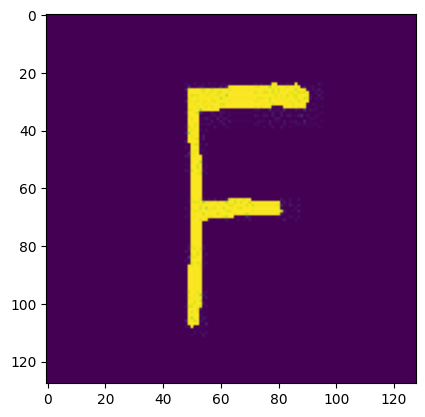

In [18]:
# STEP 4.2

# These libraries let us import the letters, resize them, and print them out
import cv2
import matplotlib.pyplot as plt

# This code processes all the scanned images and adds them to the handwritten_story
handwritten_story = []
for i in range(len(files)):
  img = cv2.imread("/content/lab1-neural-networks/letters_mod/"+files[i],cv2.IMREAD_GRAYSCALE)
  handwritten_story.append(img)

print("Imported the scanned images.")

plt.imshow(handwritten_story[4])  #<--- Change this index to see different letters


In [19]:
# STEP 4.3

# These are libraries we need to do some math on the image
# to be able to give it to the MLP in the right format and to resize it to 28x28 pixels
import numpy
import cv2

typed_story = ""
for letter in handwritten_story:
    letter = cv2.resize(letter, (28,28), interpolation = cv2.INTER_CUBIC)
    single_item_array = (numpy.array(letter)).reshape(1,784)
    prediction = mlp2.predict(single_item_array)
    typed_story = typed_story + str(chr(prediction[0]+96))

print("Conversion to typed story complete!")
print(typed_story)

Conversion to typed story complete!
ffnjtxdgrjtzjoaajrajnjjwjjrjtmwjhjtnddjhsjjozmjtzmjzxxjxaaejcxttmemjuhawjwtaxtzjxzujafrsjxjjjxtjasor


In [20]:
# STEP 4.4

# This is a library we need to do some math on the image to be able to give it to the MLP in the right format
import numpy

typed_story = ""
for letter in handwritten_story:
  letter = cv2.resize(letter, (28,28), interpolation = cv2.INTER_CUBIC)

  #this bit of code checks to see if the image is just a blank space by looking at the color of all the pixels summed
  total_pixel_value = 0
  for j in range(28):
    for k in range(28):
      total_pixel_value += letter[j,k]
  if total_pixel_value < 20:
    typed_story = typed_story + " "
  else:         #if it NOT a blank, it actually runs the prediction algorithm on it
    single_item_array = (numpy.array(letter)).reshape(1,784)
    prediction = mlp2.predict(single_item_array)
    typed_story = typed_story + str(chr(prediction[0]+96))

print("Conversion to typed story complete!")
print(typed_story)

Conversion to typed story complete!
ffn txdgr t  oaa rajnj wjjrjtmw h t dd hs joz  tz  zxx xaae cxttmem uhaw w ax z xzu afrs xjj xt asor


<ipython-input-20-d2ad2478f03d>:14: RuntimeWarning: overflow encountered in scalar add
  total_pixel_value += letter[j,k]
<ipython-input-20-d2ad2478f03d>:14: RuntimeWarning: overflow encountered in scalar add
  total_pixel_value += letter[j,k]
<ipython-input-20-d2ad2478f03d>:14: RuntimeWarning: overflow encountered in scalar add
  total_pixel_value += letter[j,k]
<ipython-input-20-d2ad2478f03d>:14: RuntimeWarning: overflow encountered in scalar add
  total_pixel_value += letter[j,k]
<ipython-input-20-d2ad2478f03d>:14: RuntimeWarning: overflow encountered in scalar add
  total_pixel_value += letter[j,k]
<ipython-input-20-d2ad2478f03d>:14: RuntimeWarning: overflow encountered in scalar add
  total_pixel_value += letter[j,k]
<ipython-input-20-d2ad2478f03d>:14: RuntimeWarning: overflow encountered in scalar add
  total_pixel_value += letter[j,k]
<ipython-input-20-d2ad2478f03d>:14: RuntimeWarning: overflow encountered in scalar add
  total_pixel_value += letter[j,k]
<ipython-input-20-d2ad24

Processed the scanned images.


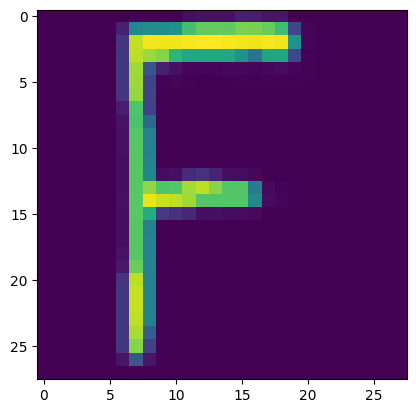

In [21]:
# STEP 4.5

# These steps process the scanned images to be in the same format and have the same properties as the EMNIST images
# They are described by the EMNIST authors in detail here: https://arxiv.org/abs/1702.05373v1
processed_story = []

for img in handwritten_story:
  #step 1: Apply Gaussian blur filter
  img = cv2.GaussianBlur(img, (7,7), 0)

  #steps 2 and 3: Extract the Region of Interest in the image and center in square
  points = cv2.findNonZero(img)
  x, y, w, h = cv2.boundingRect(points)
  if (w > 0 and h > 0):
    if w > h:
      y = y - (w-h)//2
      img = img[y:y+w, x:x+w]
    else:
      x = x - (h-w)//2
      img = img[y:y+h, x:x+h]

  #step 4: Resize and resample to be 28 x 28 pixels
  img = cv2.resize(img, (28,28), interpolation = cv2.INTER_CUBIC)

  #step 5: Normalize pixels and reshape before adding to the new story array
  img = img/255
  img = img.reshape((28,28))
  processed_story.append(img)

print("Processed the scanned images.")

import matplotlib.pyplot as plt
plt.imshow(processed_story[4]) #<<< change this index if you want to see a different letter from the story

In [22]:
# STEP 4.6

# This is a library we need to do some math on the image to be able to give it to the MLP in the right format
import numpy

typed_story = ""
for letter in processed_story:
  #this bit of code checks to see if the image is just a blank space by looking at the color of all the pixels summed
  total_pixel_value = 0
  for j in range(28):
    for k in range(28):
      total_pixel_value += letter[j,k]
  if total_pixel_value < 20:
    typed_story = typed_story + " "
  else:         #if it NOT a blank, it actually runs the prediction algorithm on it
    single_item_array = (numpy.array(letter)).reshape(1,784)
    prediction = mlp2.predict(single_item_array)
    typed_story = typed_story + str(chr(prediction[0]+96))

print("Conversion to typed story complete!")
print(typed_story)

Conversion to typed story complete!
wzn tedjr ts ody vozmx wdjjgmmw m tnss ms gdxn rin beq qoda qemmmam qmmw wtobje esq wins egj ew osnn
